##  1-) Veri Hakkında genel bilgiler ve veri görselleştirme

In [1]:
import pandas as pd 

titanic = pd.read_csv("train.csv")
df = titanic
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df = df.drop(["Name","Cabin","Ticket","PassengerId"],axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [5]:
df.Age.mean()

29.69911764705882

In [6]:
df['Age'] = df['Age'].fillna(df.Age.mean())

In [7]:
df['Embarked'] = df['Embarked'].fillna("S")

In [8]:
df.Sex = pd.Categorical(df.Sex)
df.Embarked = pd.Categorical(df.Embarked)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    category
 3   Age       891 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  891 non-null    category
dtypes: category(2), float64(2), int64(4)
memory usage: 43.9 KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
Age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292


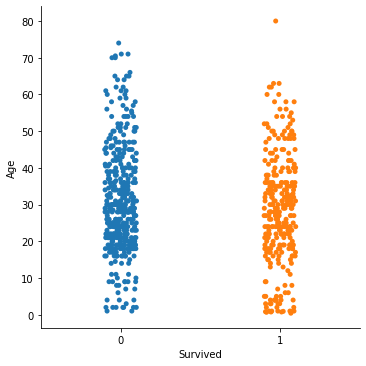

In [11]:
import seaborn as sns 
sns.catplot(x = "Survived", y = "Age", data = titanic);

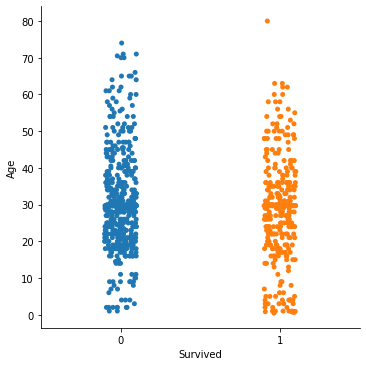

In [12]:
sns.catplot(x = "Survived", y = "Age", data = df);

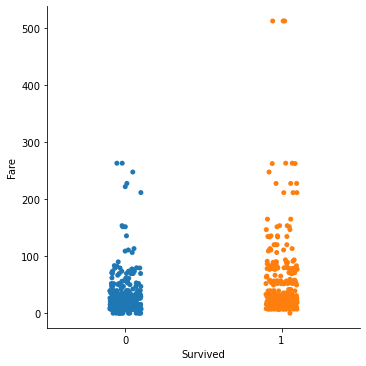

In [13]:
sns.catplot(x = "Survived", y = "Fare", data = df);

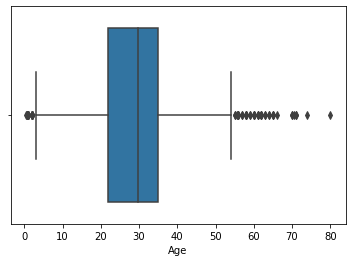

In [14]:
sns.boxplot(x = df["Age"]);

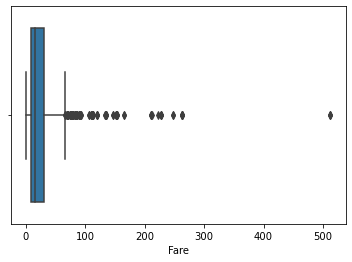

In [15]:
sns.boxplot(x = df["Fare"]);

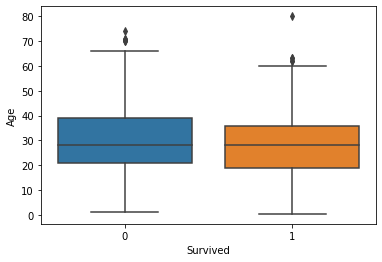

In [16]:
# NaN veriler ortalamaya eşitlenmeden
sns.boxplot(x = "Survived", y = "Age", data = titanic);

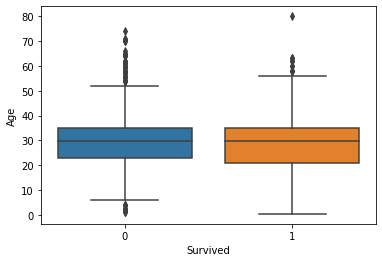

In [17]:
# NaN veriler ortalamaya eşitlendikten sonra
sns.boxplot(x = "Survived", y = "Age", data = df);

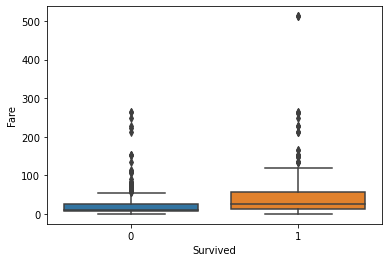

In [18]:
sns.boxplot(x = "Survived", y = "Fare", data = df);

In [19]:
df.groupby(['Survived']).mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.415100,0.553734,0.329690,22.117887
1,1.950292,28.549778,0.473684,0.464912,48.395408


In [20]:
df.groupby(['Sex']).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.742038,2.159236,28.216730,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.505824,0.429809,0.235702,25.523893


In [21]:
df.groupby(['SibSp']).mean()

,Survived,Pclass,Age,Parch,Fare
SibSp,,,,,
0,0.345395,2.351974,31.014851,0.185855,25.692028
1,0.535885,2.057416,30.041134,0.655502,44.147370
2,0.464286,2.357143,23.378477,0.642857,51.753718
3,0.250000,2.562500,17.862279,1.312500,68.908862
4,0.166667,3.000000,7.055556,1.500000,31.855556
5,0.000000,3.000000,10.200000,2.000000,46.900000
8,0.000000,3.000000,29.699118,2.000000,69.550000


In [22]:
df.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,37.048118,0.416667,0.356481,84.154687
2,0.472826,29.866958,0.402174,0.380435,20.662183
3,0.242363,26.403259,0.615071,0.393075,13.675550


In [23]:
df.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,37.048118,0.416667,0.356481,84.154687
2,0.472826,29.866958,0.402174,0.380435,20.662183
3,0.242363,26.403259,0.615071,0.393075,13.675550


In [24]:
df.groupby(['Embarked']).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,
C,0.553571,1.886905,30.562419,0.386905,0.363095,59.954144
Q,0.389610,2.909091,29.113724,0.428571,0.168831,13.276030
S,0.339009,2.346749,29.544382,0.569659,0.411765,27.243651


In [25]:
df.groupby(['Parch']).mean()

,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,
0,0.343658,2.321534,31.604368,0.237463,25.586774
1,0.550847,2.203390,24.779771,1.084746,46.778180
2,0.500000,2.275000,19.089243,2.062500,64.337604
3,0.600000,2.600000,33.200000,1.000000,25.951660
4,0.000000,2.500000,44.500000,0.750000,84.968750
5,0.200000,3.000000,39.200000,0.600000,32.550000
6,0.000000,3.000000,43.000000,1.000000,46.900000


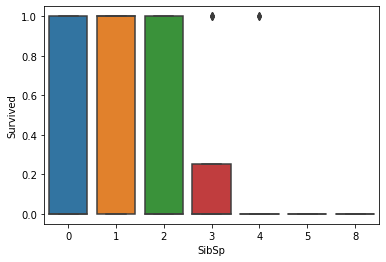

In [26]:
sns.boxplot(x = "SibSp", y = "Survived", data = df);

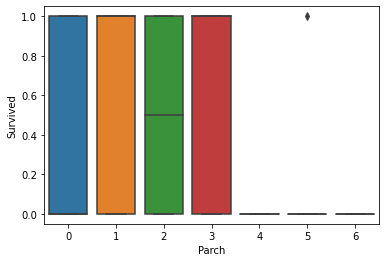

In [27]:
sns.boxplot(x = "Parch", y = "Survived", data = df);

In [28]:
total_relatives = df.Parch + df.SibSp

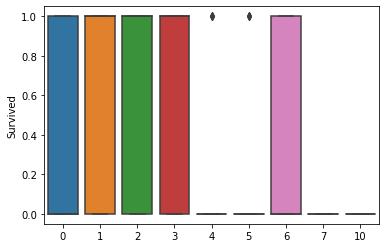

In [29]:
sns.boxplot(x = total_relatives, y = "Survived", data = df);

## Yalnız olmak önemli mi 

In [30]:
is_alone = list()

for index, value in total_relatives.items():
    if value < 1:
        is_alone.append(1)
    else :
        is_alone.append(0)
        
is_alone = pd.Series(is_alone)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(is_alone, df.Survived)

numerator = cm[0,0] + cm[1,1]
denominator = cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0] 
accuracy = numerator/denominator
accuracy

0.3793490460157127

In [31]:
is_alone.value_counts()

df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Akraba sayısı ve hayatta kalma ilişkisi

In [32]:
total_relatives.name = "total_relatives"

df2 = pd.concat([df, total_relatives],axis=1)

In [33]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,total_relatives
0,0,3,male,22.000000,1,0,7.2500,S,1
1,1,1,female,38.000000,1,0,71.2833,C,1
2,1,3,female,26.000000,0,0,7.9250,S,0
3,1,1,female,35.000000,1,0,53.1000,S,1
4,0,3,male,35.000000,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,0
887,1,1,female,19.000000,0,0,30.0000,S,0
888,0,3,female,29.699118,1,2,23.4500,S,3
889,1,1,male,26.000000,0,0,30.0000,C,0


In [34]:
df2.groupby(["total_relatives"]).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
total_relatives,,,,,,
0,0.303538,2.400372,31.595871,0.000000,0.000000,21.242689
1,0.552795,1.919255,31.160252,0.763975,0.236025,49.894129
2,0.578431,2.225490,26.359040,0.872549,1.127451,39.692482
3,0.724138,2.068966,19.062698,1.344828,1.655172,54.864510
4,0.200000,2.666667,23.186431,2.133333,1.866667,58.094453
5,0.136364,2.590909,18.409091,2.818182,2.181818,73.722727
6,0.333333,3.000000,15.166667,3.250000,2.750000,29.366667
7,0.000000,3.000000,15.666667,4.333333,2.666667,46.900000
10,0.000000,3.000000,29.699118,8.000000,2.000000,69.550000


## Sonuç 

### Veri üzerinde yapılan incelemelere göre zengin olmak (First Class yada Daha fazla ücret ödeyenler), kadın olmak, daha az akrabaya sahip olmak hayatta kalma şansını arttıran faktörler olabilir.   

### ! Daha az akrabaya sahip olmak hayatta kalma şansını arttırırken yanlız olmak arttırmıyor 

## 2-) Feature Engineering ve yeni elde edilen özniteliklerin görselleştirilmesi

In [35]:
df2.total_relatives

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: total_relatives, Length: 891, dtype: int64

In [36]:
TotRel = list()


for index, value in total_relatives.items():
    if value < 1:
        TotRel.append("0")
    elif value < 4:
        TotRel.append("1")
    elif value < 7:
        TotRel.append("2")
    else :
        TotRel.append("3")

TotRel = pd.Series(TotRel)        
TotRel.name = "TotRel"

df = pd.concat([df, TotRel],axis=1)

In [37]:
df['Sex'] = df['Sex'].cat.codes

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    int8    
 3   Age       891 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  891 non-null    category
 8   TotRel    891 non-null    object  
dtypes: category(1), float64(2), int64(4), int8(1), object(1)
memory usage: 50.7+ KB


In [39]:
y = df["Survived"]

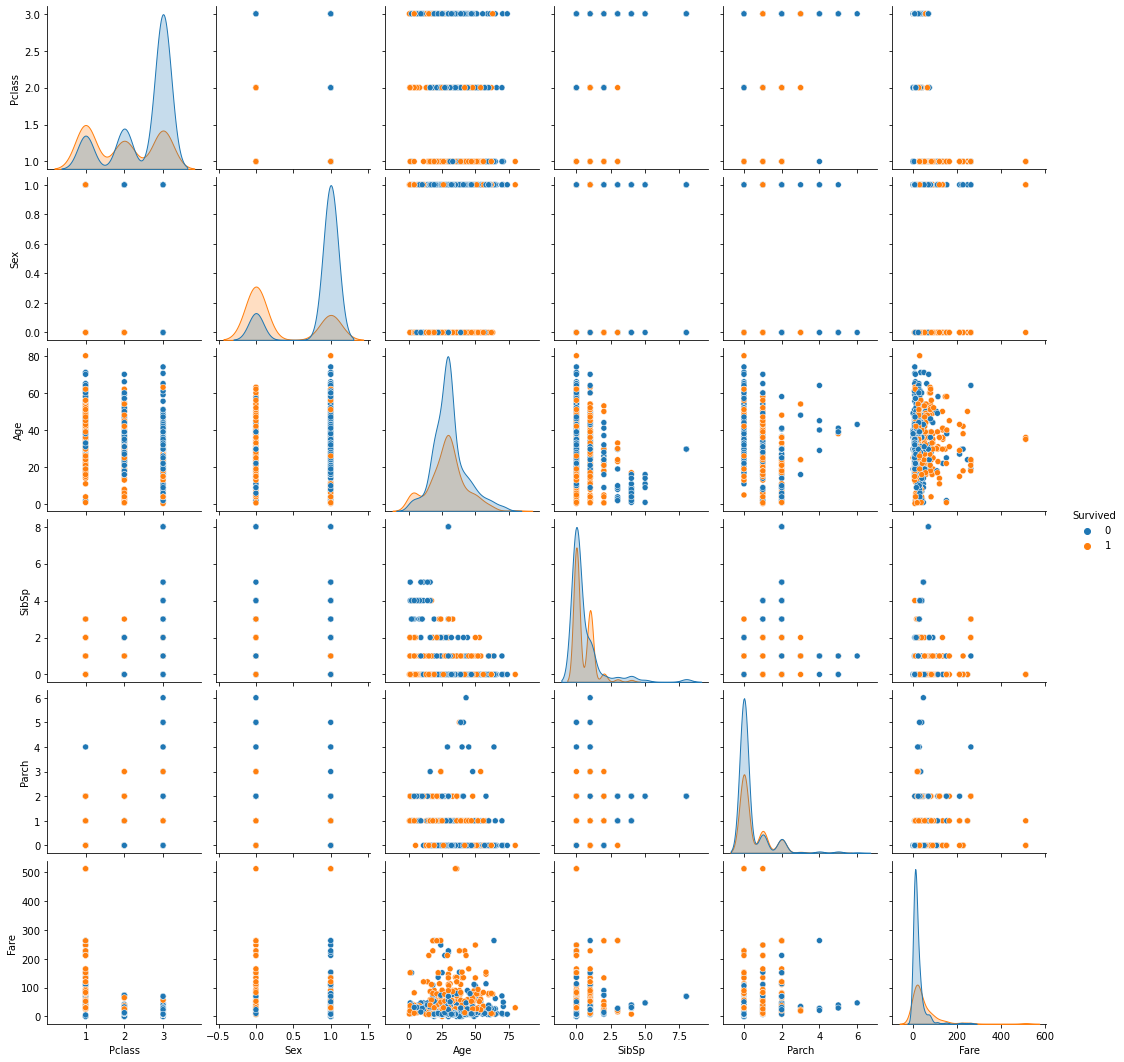

In [40]:
sns.pairplot(df, hue= "Survived")

<AxesSubplot:xlabel='Survived', ylabel='count'>

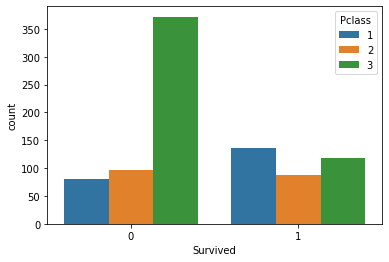

In [41]:
sns.countplot(x="Survived",hue="Pclass",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

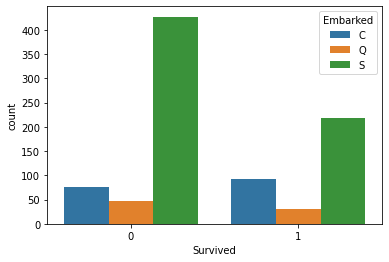

In [42]:
sns.countplot(x="Survived",hue="Embarked",data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

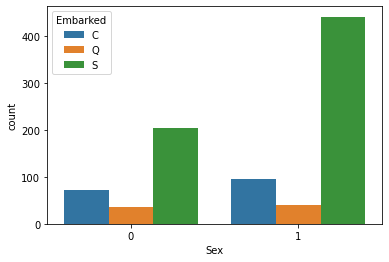

In [43]:
sns.countplot(x="Sex",hue="Embarked",data=df)

C:\Users\MONSTER\anaconda3\envs\OpenCV2\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


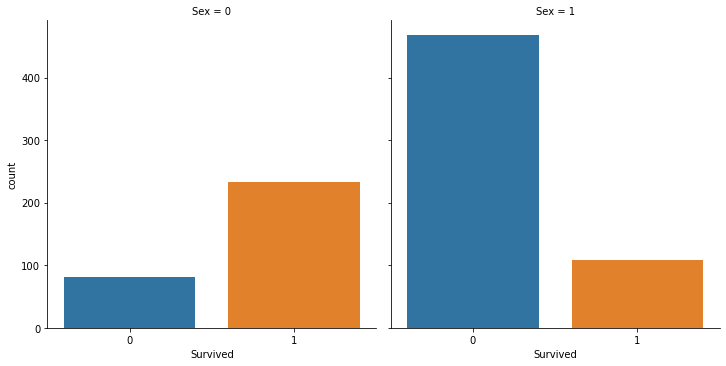

In [44]:
sns.factorplot(x="Survived",col="Sex",kind="count",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

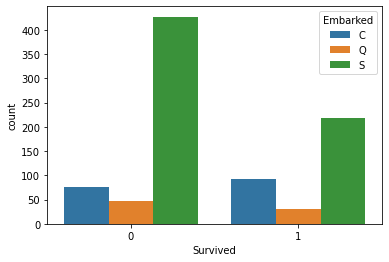

In [45]:
sns.countplot(x="Survived",hue="Embarked",data=df)

## Sütunlar birleştirilebilir mi ? 

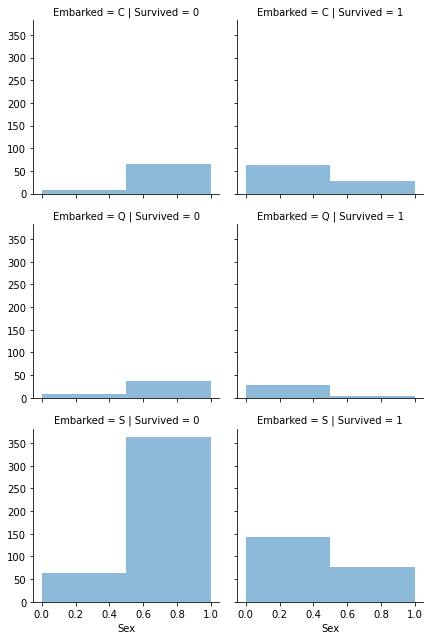

In [47]:
import matplotlib.pyplot as plt

grid = sns.FacetGrid(df, col='Survived', row='Embarked')
grid.map(plt.hist, 'Sex', alpha=.5, bins=2)
grid.add_legend();

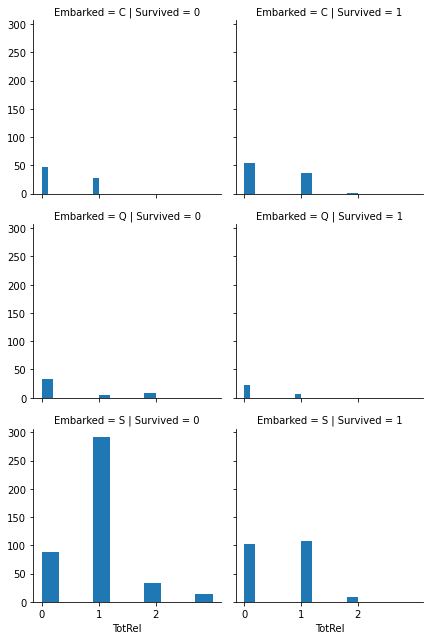

In [48]:
grid = sns.FacetGrid(df, col='Survived', row='Embarked')
grid.map(plt.hist, 'TotRel')
grid.add_legend();

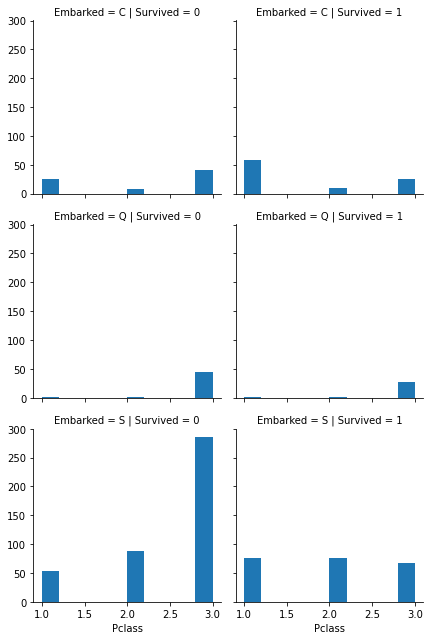

In [49]:
grid = sns.FacetGrid(df, col='Survived', row='Embarked')
grid.map(plt.hist, 'Pclass')
grid.add_legend();

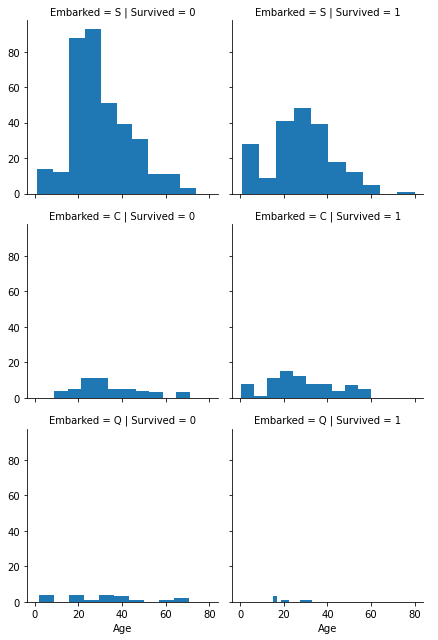

In [50]:
grid = sns.FacetGrid(titanic, col='Survived', row='Embarked')
grid.map(plt.hist, 'Age')
grid.add_legend();

In [51]:
embark=pd.get_dummies(df["Embarked"],drop_first=True)
df=pd.concat([df,embark],axis=1)
df = df.drop(["Embarked"],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,TotRel,Q,S
0,0,3,1,22.000000,1,0,7.2500,1,0,1
1,1,1,0,38.000000,1,0,71.2833,1,0,0
2,1,3,0,26.000000,0,0,7.9250,0,0,1
3,1,1,0,35.000000,1,0,53.1000,1,0,1
4,0,3,1,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0,0,1
887,1,1,0,19.000000,0,0,30.0000,0,0,1
888,0,3,0,29.699118,1,2,23.4500,1,0,1
889,1,1,1,26.000000,0,0,30.0000,0,0,0


In [52]:
df["Age"].corr(y)

-0.06980851528714313

In [53]:
df['Sex'].corr(y)

-0.5433513806577551

## 3-) Makine öğrenmesi 

In [141]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split,ShuffleSplit,cross_val_score,GridSearchCV,StratifiedKFold,cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.feature_selection import mutual_info_classif,chi2,SelectKBest,RFECV,f_classif,SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool
from lightgbm.sklearn import LGBMClassifier
import warnings

warnings.filterwarnings("ignore")

x = df.drop(["Survived","SibSp","Parch"],axis=1)
y = df["Survived"]

X = minmax_scale(x)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
cv = 10

# Logistic Regression 
params = {
    "max_iter" : [5,10,20,30,40,50,60,70,80,90,100],
}

model = LogisticRegression()
gridSCV = GridSearchCV(model,params,cv=cv)
gridSCV.fit(X_train,y_train)
print("Best Parameters:{}".format(gridSCV.best_params_))
model = gridSCV.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

Best Parameters:{'max_iter': 20}


0.8044692737430168

In [85]:
params = { 
    "n_neighbors" : np.arange(1,50),
    "leaf_size" : [2,5,10,15,20,25]
}

model = KNeighborsClassifier()
gridSCV = GridSearchCV(model,params,cv=cv)
gridSCV.fit(X_train,y_train)
print("Best Parameters:{}".format(gridSCV.best_params_))
model = gridSCV.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

Best Parameters:{'leaf_size': 2, 'n_neighbors': 24}


0.7932960893854749

In [86]:
params = {
     "C" : [0.1, 1, 10],  
     "gamma" : [0.0001, 0.001, 0.01, 0.1, 1, 10], 
     "kernel" : ["linear", "poly", "rbf", "sigmoid"]
 }

model = SVC()
gridSCV = GridSearchCV(model,params,cv=cv)
gridSCV.fit(X_train,y_train)
print("Best Parameters:{}".format(gridSCV.best_params_))
model = gridSCV.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

Best Parameters:{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


0.8044692737430168

In [87]:
from sklearn.model_selection import cross_val_score

model = GaussianNB()
model.fit(X_train, y_train)
scores = cross_val_score(model, X, y, cv=10)
print(scores.mean())

0.798039950062422


In [88]:
params = {
    "max_depth" : [2,4,6,8],
    "max_leaf_nodes" : [20, 50, 80],
    "min_samples_split": [2, 3, 4]
}

model = DecisionTreeClassifier()
gridSCV = GridSearchCV(model,params,cv=cv)
gridSCV.fit(X_train,y_train)
model = gridSCV.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8156424581005587

In [89]:
params = { 
    "n_estimators": [10,100,500,1000],
    "max_depth" : [2,3,5,8,10],
    "max_features" : [2,5,8],
    "min_samples_split" : [2,5,10]
}

model = RandomForestClassifier()
gridSCV = GridSearchCV(model,params,cv=cv)
gridSCV.fit(X_train,y_train)
model = gridSCV.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7988826815642458

In [90]:
print("Best Parameters:{}".format(gridSCV.best_params_))

Best Parameters:{'max_depth': 5, 'max_features': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [91]:
params = {
    "base_estimator" : [SVC(),
                       KNeighborsClassifier(n_neighbors=3),
                       GradientBoostingClassifier(),
                       DecisionTreeClassifier(),
                       BaggingClassifier()],
    "n_estimators" : [10,20,30,40],
    "max_samples" : [0.05, 0.1, 0.2, 0.5]
}

model = BaggingClassifier()
gridSCV = GridSearchCV(model,params,cv=cv)
gridSCV.fit(X_train,y_train)
model = gridSCV.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8212290502793296

In [92]:
print("Best Parameters:{}".format(gridSCV.best_params_))

Best Parameters:{'base_estimator': GradientBoostingClassifier(), 'max_samples': 0.1, 'n_estimators': 30}


In [93]:
params = { 
    "base_estimator" : [SVC(),
                       KNeighborsClassifier(),
                       GradientBoostingClassifier(),
                       DecisionTreeClassifier(),
                       RandomForestClassifier()],
    "n_estimators": [10,20,50],
    "learning_rate" : [0.1, 0.05, 0.01, 0.005]    
}

model = AdaBoostClassifier()
gridSCV = GridSearchCV(model,params,cv=cv)
gridSCV.fit(X_train,y_train)
model = gridSCV.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8324022346368715

In [94]:
print("Best Parameters:{}".format(gridSCV.best_params_))

Best Parameters:{'base_estimator': GradientBoostingClassifier(), 'learning_rate': 0.1, 'n_estimators': 20}


In [95]:
params = { 
    "n_estimators": [20,50,100],
    "max_depth" : [3,5,7],
    "learning_rate" : [0.1, 0.05, 0.01, 0.005],
    "subsample" : [0.6,0.8,1.0] 
}

model = GradientBoostingClassifier()
gridSCV = GridSearchCV(model,params,cv=cv)
gridSCV.fit(X_train,y_train)
model = gridSCV.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8156424581005587

In [96]:
print("Best Parameters:{}".format(gridSCV.best_params_))

Best Parameters:{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.6}


In [97]:
params = {
    "n_estimators" : [50,100,300,500,1000],
    "subsample" :[0.6,0.8,1.0],
    "learning_rate" : [0.1, 0.01, 0.02, 0.05],
    "max_depth" : [2, 3, 4, 5, 6, 8],
    "min_samples_split" :[2,5,10]
}

 
model = XGBClassifier(verbosity=0)
gridSCV = GridSearchCV(model,params,cv=cv)
gridSCV.fit(X_train,y_train)
model = gridSCV.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8268156424581006

In [98]:
print("Best Parameters:{}".format(gridSCV.best_params_))

Best Parameters:{'learning_rate': 0.1, 'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 1.0}


In [99]:
params = {
    "learning_rate" : [0.1, 0.05, 0.01],
    "iterations" : [20,50,100]
}

model = CatBoostClassifier(verbose=0)
gridSCV = GridSearchCV(model,params,cv=cv)
gridSCV.fit(X_train,y_train)
model = gridSCV.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8212290502793296

In [100]:
print("Best Parameters:{}".format(gridSCV.best_params_))

Best Parameters:{'iterations': 100, 'learning_rate': 0.1}


In [101]:
params = {
    "learning_rate" : [0.1, 0.05, 0.01, 0.005],
    "n_estimators" : [8,16,24],
    "num_leaves": [6,8,12,16]
}

model = LGBMClassifier()
gridSCV = GridSearchCV(model,params,cv=cv)
gridSCV.fit(X_train,y_train)
model = gridSCV.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8044692737430168

In [102]:
print("Best Parameters:{}".format(gridSCV.best_params_))

Best Parameters:{'learning_rate': 0.05, 'n_estimators': 24, 'num_leaves': 8}


In [103]:
params = {
    "alpha" : [1,0.5,0.1, 0.05, 0.01, 0.005, 0.0001],
    "hidden_layer_sizes" : [(10,10,10),
                            (100,100,100),
                            (3,5),
                            (5,3)],
    "solver" : ["lbfgs","adam","sgd"],
    "activation" : ["relu","logistic"]
}

model = MLPClassifier()
gridSCV = GridSearchCV(model,params,cv=cv)
gridSCV.fit(X_train,y_train)
model = gridSCV.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8268156424581006

In [104]:
print("Best Parameters:{}".format(gridSCV.best_params_))

Best Parameters:{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (100, 100, 100), 'solver': 'adam'}


## 4-) Test verisi üzerinde tahmin yapmak ve bu tahminleri istenilen formatta kaydetmek

In [120]:
x_train = df.drop(["Survived","SibSp","Parch"],axis=1)
y_train = df["Survived"]

X_train = minmax_scale(x)

In [136]:
model = AdaBoostClassifier(base_estimator = GradientBoostingClassifier(), learning_rate = 0.1, n_estimators= 20)
model.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=GradientBoostingClassifier(),
                   learning_rate=0.1, n_estimators=20)

In [144]:
test_df = pd.read_csv('test.csv')

test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].dropna().median(), inplace=True)

test_df.Sex = pd.Categorical(test_df.Sex)
test_df.Embarked = pd.Categorical(test_df.Embarked)

test_df['Sex'] = test_df['Sex'].cat.codes

total_relatives = test_df.Parch + test_df.SibSp
TotRel = list()

for index, value in total_relatives.items():
    if value < 1:
        TotRel.append("0")
    elif value < 4:
        TotRel.append("1")
    elif value < 7:
        TotRel.append("2")
    else :
        TotRel.append("3")

TotRel = pd.Series(TotRel)        
TotRel.name = "TotRel"

test_df = pd.concat([test_df, TotRel],axis=1)

embark=pd.get_dummies(test_df["Embarked"],drop_first=True)
test_df=pd.concat([test_df,embark],axis=1)

test_df = test_df.drop(['Parch', 'SibSp','Name','Ticket', 'Cabin','Embarked'], axis=1)
test_df

,PassengerId,Pclass,Sex,Age,Fare,TotRel,Q,S
0,892,3,1,34.5,7.8292,0,1,0
1,893,3,0,47.0,7.0000,1,0,1
2,894,2,1,62.0,9.6875,0,1,0
3,895,3,1,27.0,8.6625,0,0,1
4,896,3,0,22.0,12.2875,1,0,1
...,...,...,...,...,...,...,...,...
413,1305,3,1,27.0,8.0500,0,0,1
414,1306,1,0,39.0,108.9000,0,0,0
415,1307,3,1,38.5,7.2500,0,0,1
416,1308,3,1,27.0,8.0500,0,0,1


In [138]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,TotRel,Q,S
0,0,3,1,22.000000,1,0,7.2500,1,0,1
1,1,1,0,38.000000,1,0,71.2833,1,0,0
2,1,3,0,26.000000,0,0,7.9250,0,0,1
3,1,1,0,35.000000,1,0,53.1000,1,0,1
4,0,3,1,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0,0,1
887,1,1,0,19.000000,0,0,30.0000,0,0,1
888,0,3,0,29.699118,1,2,23.4500,1,0,1
889,1,1,1,26.000000,0,0,30.0000,0,0,0


In [148]:
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_test = minmax_scale(X_test)
Y_pred = model.predict(X_test)

## Tahminleri csv dosyasına istenilen formatta yazdırmak 

In [149]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)